### let's look at some of the (hopefully) pretty molecules we generate!

In [1]:
from rdkit import Chem
import pickle

from ipywidgets import interact, fixed, IntSlider
import ipywidgets
import py3Dmol

def show_mol(mol, view, grid):
    mb = Chem.MolToMolBlock(mol)
    view.removeAllModels(viewer=grid)
    view.addModel(mb,'sdf', viewer=grid)
    view.setStyle({'model':0},{'stick': {}}, viewer=grid)
    view.zoomTo(viewer=grid)
    return view

def view_single(mol):
    view = py3Dmol.view(width=600, height=600, linked=False, viewergrid=(1,1))
    show_mol(mol, view, grid=(0, 0))
    return view

def MolTo3DView(mol, size=(600, 600), style="stick", surface=False, opacity=0.5, confId=0):
    """Draw molecule in 3D
    
    Args:
    ----
        mol: rdMol, molecule to show
        size: tuple(int, int), canvas size
        style: str, type of drawing molecule
               style can be 'line', 'stick', 'sphere', 'carton'
        surface, bool, display SAS
        opacity, float, opacity of surface, range 0.0-1.0
    Return:
    ----
        viewer: py3Dmol.view, a class for constructing embedded 3Dmol.js views in ipython notebooks.
    """
    assert style in ('line', 'stick', 'sphere', 'carton')
    mblock = Chem.MolToMolBlock(mol[confId])
    viewer = py3Dmol.view(width=size[0], height=size[1])
    viewer.addModel(mblock, 'mol')
    viewer.setStyle({style:{}})
    if surface:
        viewer.addSurface(py3Dmol.SAS, {'opacity': opacity})
    viewer.zoomTo()
    return viewer

def conf_viewer(idx, mol):
    return MolTo3DView(mol, confId=idx).show()

In [2]:
with open('trained_models/qm9/test_mols.pkl', 'rb') as f:
    test_mols = pickle.load(f)
smiles = list(test_mols.keys())

C#CC#C[C@@H](CC)CO


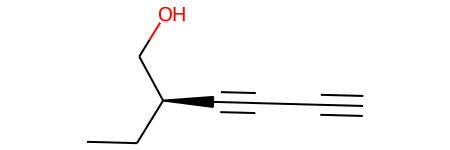

interactive(children=(IntSlider(value=0, description='idx', max=57), Output()), _dom_classes=('widget-interact…

In [4]:
test_idx = 0

smi = smiles[test_idx]
print(smi)

mol_graph = Chem.MolFromSmiles(smi)
display(mol_graph)

mols = test_mols[smi]
interact(conf_viewer, idx=ipywidgets.IntSlider(min=0, max=len(mols)-1, step=1), mol=fixed(mols));

In [52]:
import pickle

# Load the conformations from the .pkl file
with open('test_0/test_mols.pkl', 'rb') as pkl_file:
    conformations_dict = pickle.load(pkl_file)



In [55]:
print(smiles)

['C#CC#C[C@@H](CC)CO', 'C#CC#C[C@H](O)[C@H]1CN1', 'C#CC(=O)CCCCC', 'C#CC(=O)C[C@H](O)C#C', 'C#CC(=O)C[C@]1(C)CN1', 'C#CC(=O)OCCCC', 'C#CC(=O)[C@@H]1CCN1C', 'C#CC(C)(C)OCC#N', 'C#C[C@]1(C#C)CNC=N1', 'C#CC1(C)CC=CC1', 'C#CC1=CCCC1=O', 'C#CC1=CCCOC1', 'C#CC1=CCOC[C@@H]1O', 'C#CC1=C[C@@H](C)NC1=O', 'C#CC1=C[C@H](O)C[C@@H]1C', 'C#CCC(C)(C)CCC', 'C#CCC1(C)OCCO1', 'C#CCC1=C[C@H]2N[C@H]2C1', 'C#CCC[C@@H](C=O)CC', 'C#CCC[C@@H]1CNC1=O', 'C#CCC[C@@](C)(O)C#N', 'C#CCC[C@](C)(O)CC', 'C#CCN=C(C)NC=O', 'C#CCOC(C#C)=NC', 'C#CCOC(C)(C)C=O', 'C#CCOCC', 'C#CCO[C@@H](C#C)CO', 'C#CC[C@@H]1COC1=NC', 'C#CC[C@@](C)(N)C(=O)O', 'C#CC[C@H](C)[C@@H](C)O', 'C#CC[C@H](O)C(=O)C=O', 'C#CC[C@H](O)[C@@H]1N[C@@H]1C', 'C#CC[C@]1(CO)CCO1', 'C#C[C@@H](C#CC#N)C=O', 'C#C[C@@H](C#N)C#CCC', 'C#C[C@@H](C)C=O', 'C#C[C@@H](CCC)NC=O', 'C#C[C@@H]1C=C[C@@H](O)CC1', 'C#C[C@@H]1C=C[C@@H]2O[C@@H]2C1', 'C#C[C@@H]1CC(=O)O[C@@H]1C', 'C#C[C@@H]1C[C@@H]1CCCO', 'C#C[C@@H]1C[C@@]1(O)CC#N', 'C#C[C@@H]1C[C@H](O)C[C@@H]1C', 'C#C[C@@H]1C[C@]12C[C

In [110]:
#smi = smiles[0]
#smi = 'O=C[C@]12O[C@H]1[C@H]1C[C@H]12'

for idx, mol in enumerate(conformations_dict[smi], start=1):
    cmd.read_molstr(Chem.MolToMolBlock(mol), f'{smi}_conf{idx}')
    #if idx > 1:
    #    cmd.align(f'{smi}_conf{idx}', f'{smi}_conf1')
    cmd.show('sticks')
    

# Call the visualization function
#visualize_molecules(conformations_dict[smi])

O=C[C@]12O[C@H]1[C@H]1C[C@H]12


In [104]:
import xmlrpc.client as xmlrpclib
cmd = xmlrpclib.ServerProxy('http://localhost:9123')


In [111]:

with open('data/QM9/qm9/'+smi+'.pickle', 'rb') as pkl_file:
    ref_mol = pickle.load(pkl_file)


In [112]:
for i, con in enumerate(ref_mol['conformers']):
    cmd.read_molstr(Chem.MolToMolBlock(con['rd_mol']), f'{smi}_conf{idx}')
    #if idx > 1:
    #cmd.align(f'ref_{smi}_conf{idx}', f'{smi}_conf1')
    cmd.show('sticks')

28
